In [374]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv("../data/credit_ds_v3.csv")
print(f"Shape of dataset: {df.shape}")
df.head(5)

Shape of dataset: (15645, 24)


,X,number_of_cards,outstanding,credit_limit,bill,total_cash_usage,total_retail_usage,remaining_bill,branch_code,payment_ratio,...,default_flag,years_since_card_issuing,total_usage,remaining_bill_per_number_of_cards,remaining_bill_per_limit,total_usage_per_limit,total_3mo_usage_per_limit,total_6mo_usage_per_limit,utilization_3month,utilization_6month
0,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
1,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,NaN
2,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571
3,6,2,6227439,80000000.0,2081248.0,0.0,3690250.0,4613435.0,A,0.00,...,0,10.250000,3690250.0,2306717.5,0.057668,0.046128,0.017184,0.117513,0.038964,0.181863
4,7,2,3906290,4000000.0,2043682.0,0.0,230400.0,3314046.0,A,18.47,...,0,4.666667,230400.0,1657023.0,0.828511,0.057600,0.018750,0.166667,1.014776,0.977231


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15645 entries, 0 to 15644
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   X                                   15645 non-null  int64  
 1   number_of_cards                     15645 non-null  int64  
 2   outstanding                         15645 non-null  int64  
 3   credit_limit                        15645 non-null  float64
 4   bill                                15645 non-null  float64
 5   total_cash_usage                    15600 non-null  float64
 6   total_retail_usage                  15645 non-null  float64
 7   remaining_bill                      15645 non-null  float64
 8   branch_code                         15450 non-null  object 
 9   payment_ratio                       15645 non-null  float64
 10  overlimit_percentage                15619 non-null  float64
 11  payment_ratio_3month                15645

|               feature              |                        description                        |
|:----------------------------------:|:---------------------------------------------------------:|
| x                                  | user_id                                                   |
| number_of_cards                    | number of cards owned   by customer                       |
| outstanding                        | total outstanding   amount of credit card usage           |
| credit_limit                       | credit limit amount   that can be used                    |
| bill                               | last month customer   bill amount                         |
| total_cash_usage                   | last month total cash   usage of customer                 |
| total_retail_usage                 | last month total   retail usage of customer               |
| remaining_bill                     | remaining bill that   has not been paid in the last month |
| branch_code                        | branch code                                               |
| payment_ratio                      | payment per bill   ratio in the last month                |
| overlimit_percentage               | overlimit percentage                                      |
| payment_ratio_3month               | payment per bill   ratio in the last 3 month              |
| payment_ratio_6month               | payment per bill   ratio in the last 6 month              |
| delinquency_score                  | delinquency score                                         |
| years_since_card_issuing           | total year since   first card issued                      |
| total_usage                        | total usage                                               |
| remaining_bill_per_number_of_cards | ratio remaining bill   per number of cards                |
| remaining_bill_per_limit           | ratio remaining bill   per credit limit                   |
| total_usage_per_limit              | ratio total usage per   limit                             |
| total_3mo_usage_per_limit          | ratio total 3 months   usage per limit                    |
| total_6mo_usage_per_limit          | ratio total 3 months   usage per limit                    |
| utilization_3month                 | Credit card   utilization for past 3 months               |
| utilization_6month                 | Credit card   utilization for past 6 months               |
| default_flag                       | Credit default flag   (1: default; 0: non_default)        |

In [56]:
# Summary statistics for numerical features
df.describe()

,X,number_of_cards,outstanding,credit_limit,bill,total_cash_usage,total_retail_usage,remaining_bill,payment_ratio,overlimit_percentage,...,default_flag,years_since_card_issuing,total_usage,remaining_bill_per_number_of_cards,remaining_bill_per_limit,total_usage_per_limit,total_3mo_usage_per_limit,total_6mo_usage_per_limit,utilization_3month,utilization_6month
count,15645.000000,15645.000000,1.564500e+04,1.564500e+04,1.564500e+04,1.560000e+04,1.564500e+04,1.564500e+04,15645.000000,15619.000000,...,15645.000000,15645.000000,1.564500e+04,1.564500e+04,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,12803.000000
mean,7823.000000,2.506040,1.160622e+07,2.082010e+07,8.076442e+06,7.457618e+04,2.024806e+06,8.146804e+06,7.036890,3.330655,...,0.090508,6.628854,2.099281e+06,2.970392e+06,0.467782,0.108977,0.167157,0.202454,0.570447,0.526346
std,4516.466816,1.012536,2.407941e+07,2.955419e+07,1.759983e+07,6.177873e+05,7.909345e+06,1.924667e+07,792.912029,9.215148,...,0.286918,4.668085,8.073250e+06,6.270020e+06,0.473080,0.199740,0.192212,0.274421,0.411997,0.432190
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-49860.000000,0.000000,...,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,3912.000000,2.000000,1.992796e+06,5.000000e+06,8.139470e+05,0.000000e+00,0.000000e+00,0.000000e+00,-17.300000,0.000000,...,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.034767,0.032600,0.189000,0.155000
50%,7823.000000,2.000000,4.718779e+06,9.000000e+06,3.141366e+06,0.000000e+00,2.000000e+05,2.747165e+06,0.000000,0.000000,...,0.000000,5.666667,2.438000e+05,1.202134e+06,0.333000,0.021700,0.108000,0.117000,0.574000,0.480000
75%,11734.000000,3.000000,1.066531e+07,2.200000e+07,7.404069e+06,0.000000e+00,1.396204e+06,7.142464e+06,44.600000,1.010000,...,0.000000,9.330000,1.507478e+06,3.087616e+06,0.929000,0.127143,0.239000,0.285000,0.916000,0.847594
max,15645.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.000000,190.000000,...,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000


# EDA

First, exploring the distribution of the target column.

0    0.909492
1    0.090508
Name: default_flag, dtype: float64

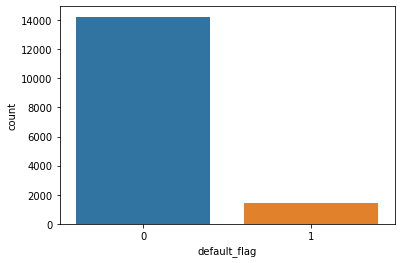

In [57]:
# bar chart
sns.countplot(df['default_flag'])

# explore the unique values in loan_status column
df['default_flag'].value_counts(normalize = True)

There is approximately 7X more False (0) labels than True (1) labels. There is definitely some class imbalance in this dataset and machine learning models work best with a balanced dataset.

To resolve this, models' hyperparameter that adds a class weight to the predictor label can be balanced. 

Certain static features not related to credit risk, such as, user_id will be dropped.

## Train Test Split

In [58]:
df = df.drop(["X"], axis=1)

X = df.drop('default_flag', axis = 1)
y = df['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42, stratify = y)

# hard copy the X datasets to avoid Pandas' SetttingWithCopyWarning when we play around with this data later on.
# this is currently an open issue between Pandas and Scikit-Learn teams
X_train, X_test = X_train.copy(), X_test.copy()

## Numerical features

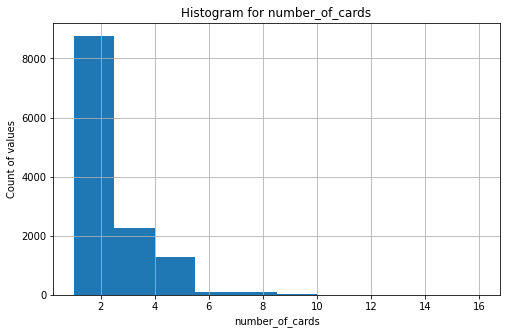

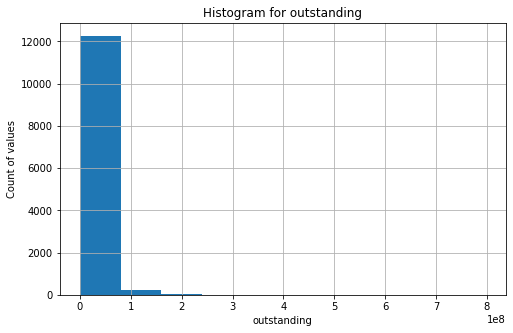

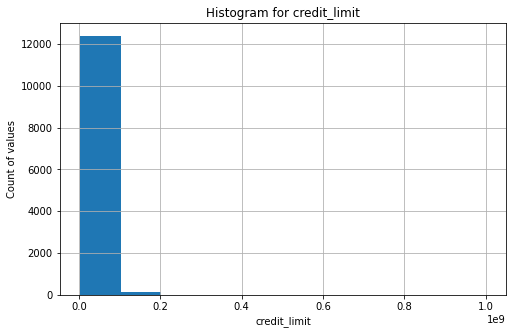

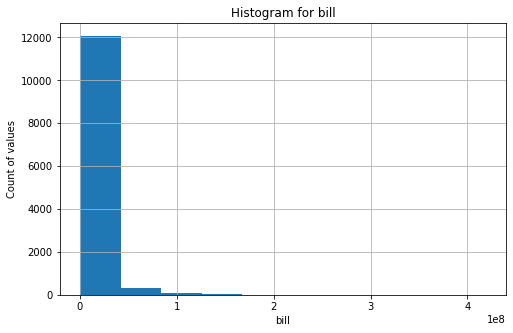

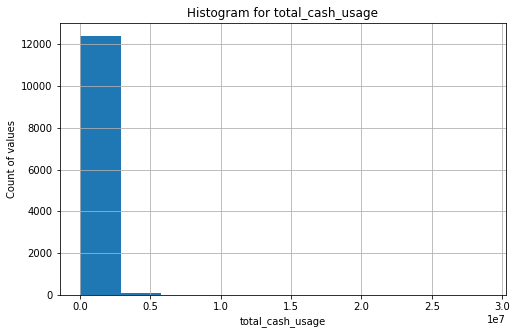

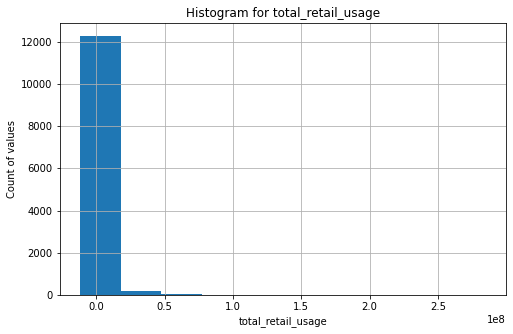

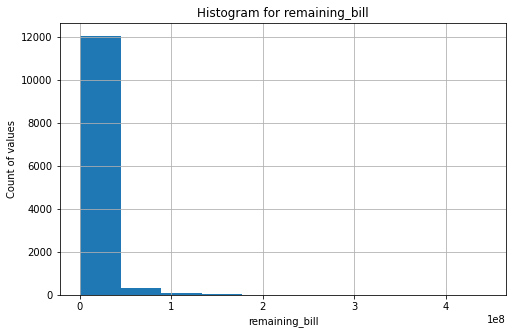

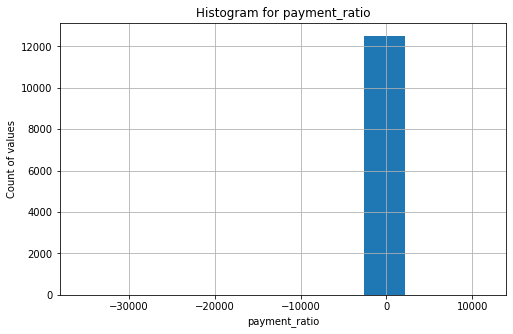

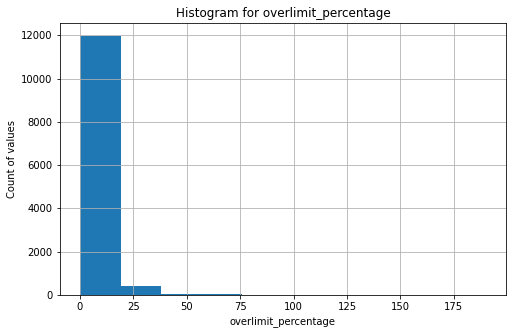

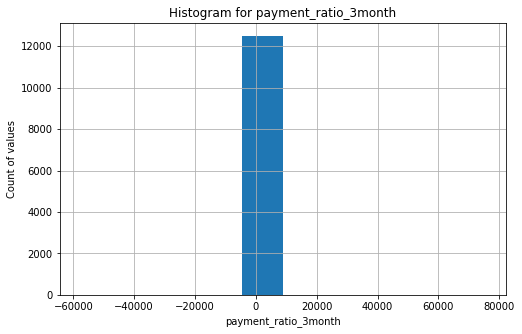

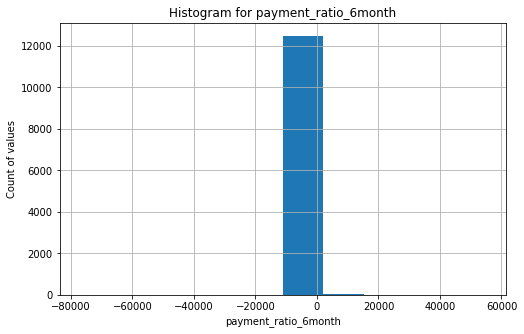

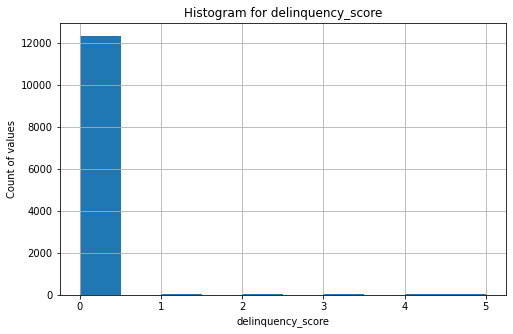

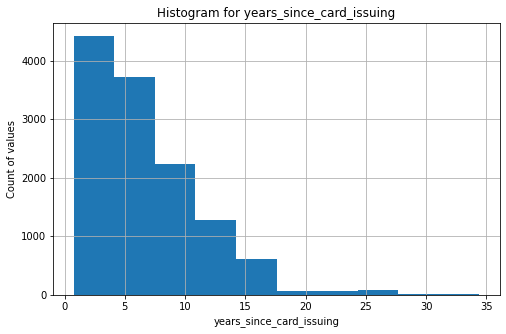

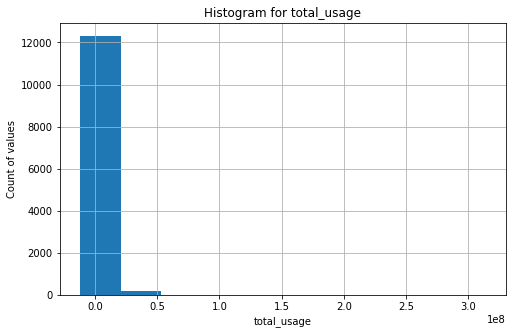

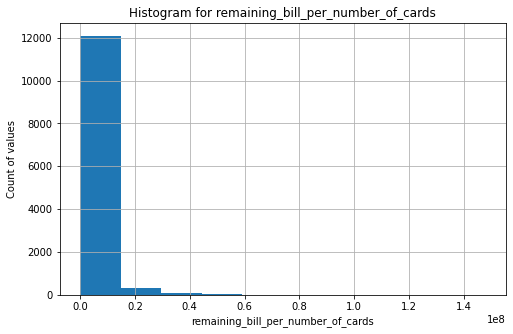

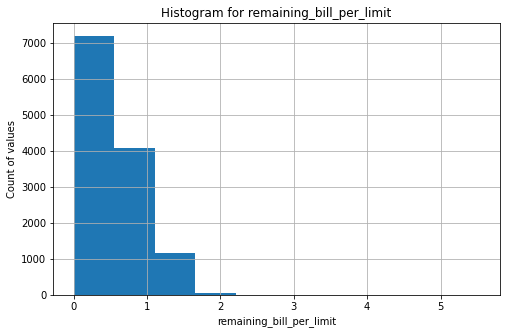

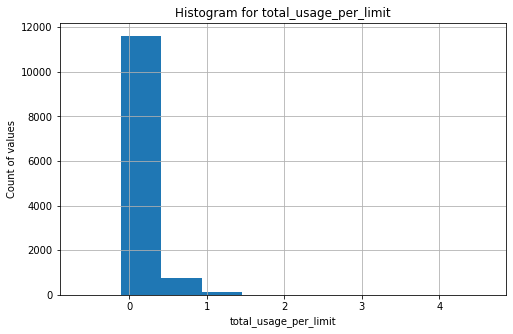

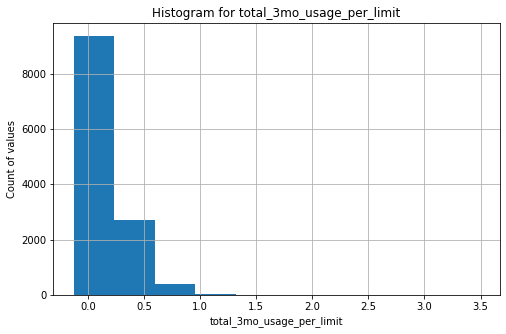

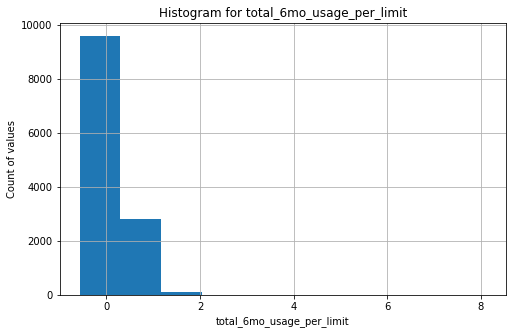

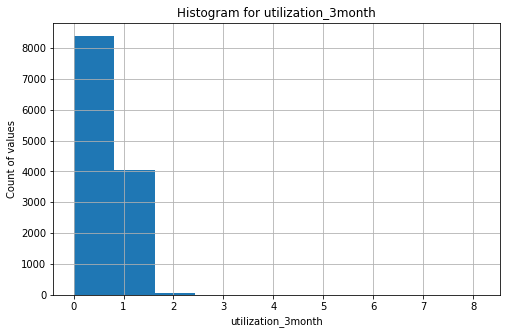

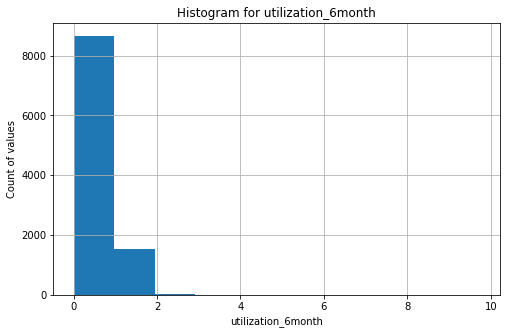

In [59]:
# Exploring numerical features

X_train_num = X_train.select_dtypes(include=['float64', 'int64'])
for c in X_train_num:
    X_train_num[c].hist(figsize=(8,5))
    plt.title('Histogram for '+c)
    plt.xlabel(c)
    plt.ylabel('Count of values')
    plt.show()

### Correlation

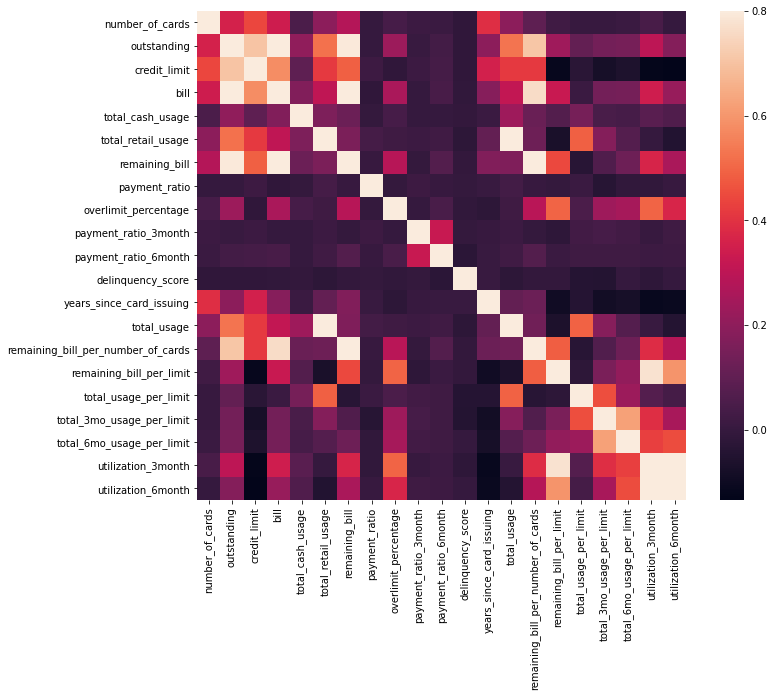

In [60]:
# Correlation matrix

corrmat = X_train_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Identify which numerical features are correlated and by what degree for potential feature engineering.

In [61]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train_num, 10))

Top Absolute Correlations
total_retail_usage        total_usage                           0.997381
remaining_bill            remaining_bill_per_number_of_cards    0.919741
outstanding               bill                                  0.866504
bill                      remaining_bill                        0.843862
utilization_3month        utilization_6month                    0.835813
outstanding               remaining_bill                        0.796212
remaining_bill_per_limit  utilization_3month                    0.777768
bill                      remaining_bill_per_number_of_cards    0.760581
outstanding               remaining_bill_per_number_of_cards    0.708475
                          credit_limit                          0.701960
dtype: float64


`remaining_bill` shares a high correlation with several variables. This feature will be dropped for this reason.

In [62]:
X_train_num = X_train_num.drop(["remaining_bill"], axis=1)

### ANOVA F-Statistic

In [63]:
# Since f_class_if does not accept missing values, I will do a very crude imputation of missing values
X_train_num_anova = X_train_num.fillna(X_train_num.mean())

# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train_num_anova, y_train)

# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num_anova.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,delinquency_score,1027.591001,0.000000e+00
1,remaining_bill_per_limit,234.583780,0.000000e+00
2,overlimit_percentage,229.096430,0.000000e+00
3,total_usage_per_limit,185.812248,0.000000e+00
4,remaining_bill_per_number_of_cards,170.796317,0.000000e+00
5,bill,136.939598,0.000000e+00
6,utilization_3month,123.008235,0.000000e+00
7,outstanding,95.865589,0.000000e+00
8,total_3mo_usage_per_limit,65.410724,0.000000e+00
9,utilization_6month,58.978445,0.000000e+00


As the p-value of `payment_ratio_3month`, `payment_ratio`, and `years_since_card_issuing` is greater than 0.05, I will drop these columns.

## Categorical Features

In [11]:
# Summary statistics for categorical features

X_train_cat = X_train.select_dtypes(exclude=['float64', 'int64'])
for c in X_train_cat:
    # Shows percentage of each value in each feature
    print(X_train[c].value_counts(normalize=True) * 100)

A    56.447177
F    10.750688
B     8.704093
I     6.350105
E     4.246886
G     3.688724
J     2.653292
H     2.475328
C     2.273095
D     1.350914
K     1.059699
Name: branch_code, dtype: float64


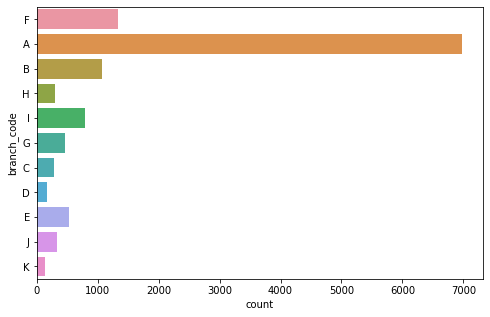

In [13]:
# Categorical features plot

for c in X_train_cat:
    plt.figure(figsize=(8,5))
    sns.countplot(y=c, data=X_train)
    plt.show()

56% of respondents are polled from the same branch code. I will make an assumption and consider this a static feature. Should this feature be decided to be included, it can be one-hot encoded for model training.

## Missing Values

<AxesSubplot:>

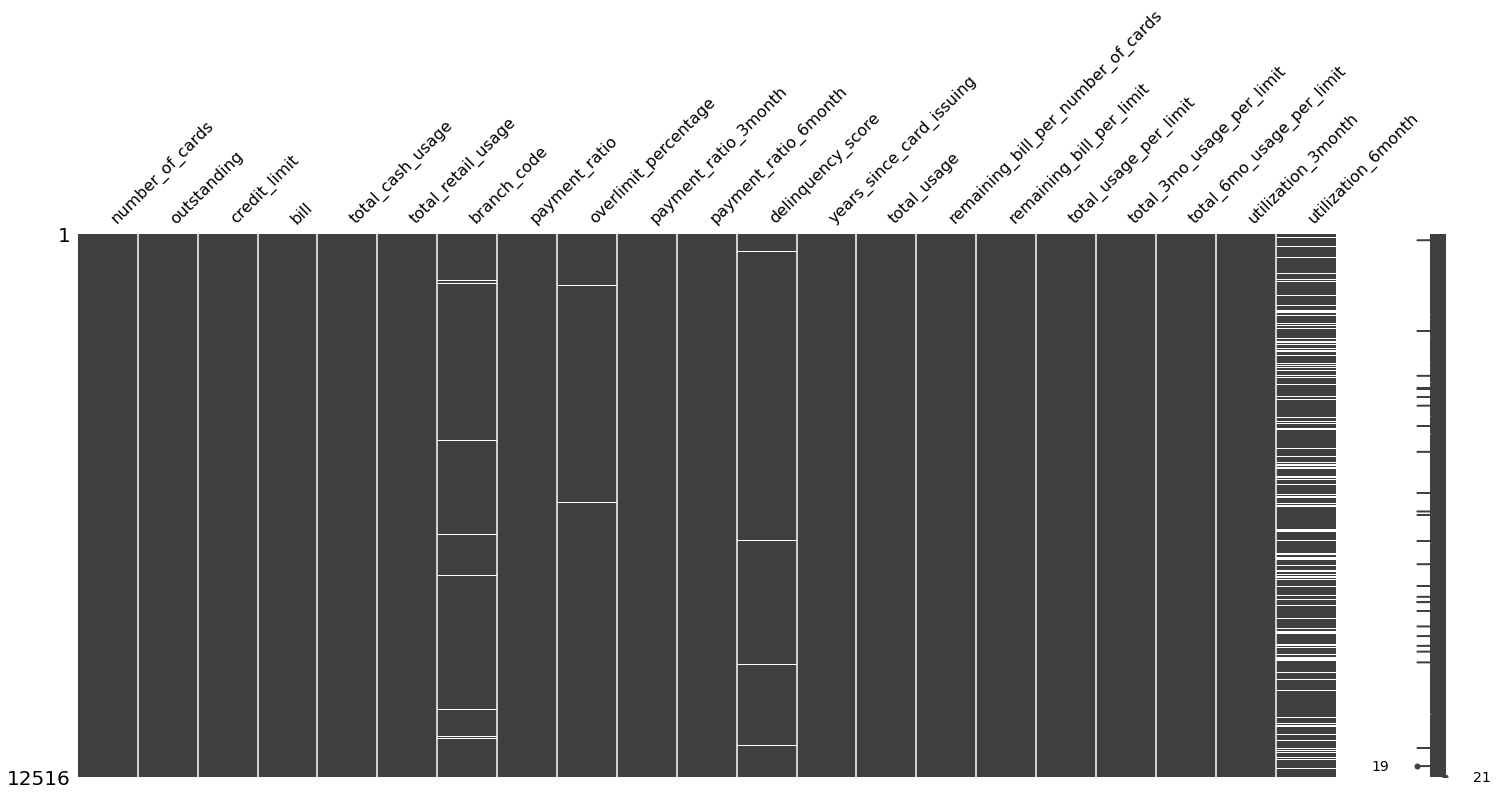

In [26]:
# Visualize missing values

msno.matrix(X_train)

In [27]:
# Missing data

total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
utilization_6month,2279,18.208693
branch_code,154,1.230425
delinquency_score,70,0.559284
total_cash_usage,36,0.287632
overlimit_percentage,17,0.135826
payment_ratio_3month,0,0.000000
outstanding,0,0.000000
credit_limit,0,0.000000
bill,0,0.000000
total_retail_usage,0,0.000000


Null values for `utilization_6month` are the highest at 18%. Since this columns' values are for credit card utilization for past 6 months, the nulls can be imputed with 0 to reflect potential real world scenario.

`branch_code` will be dropped as discussed earlier.

As the number of missing values for `delinquency_score`, `total_cash_usage`, and `overlimit_percentage` are small, these null rows can be dropped before the train-test split.

## Outliers

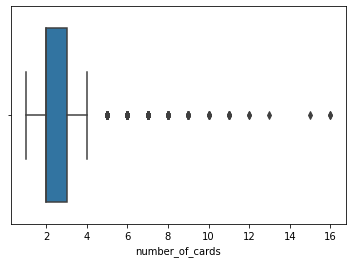

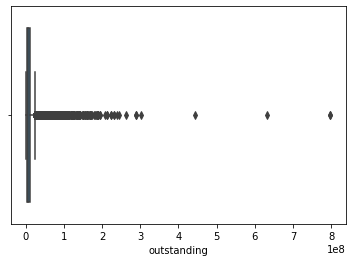

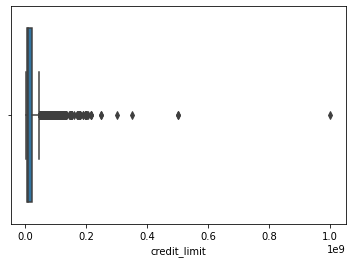

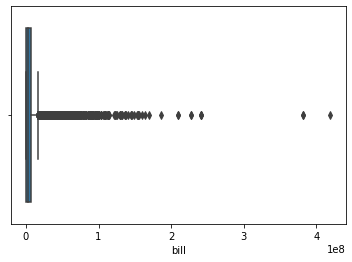

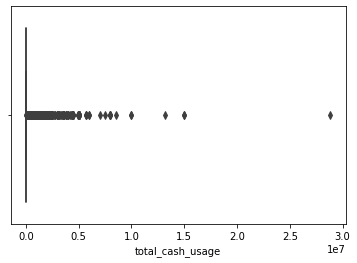

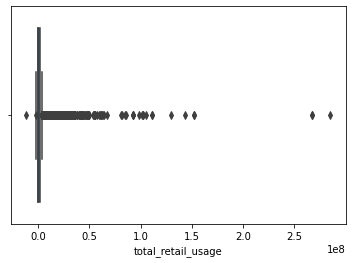

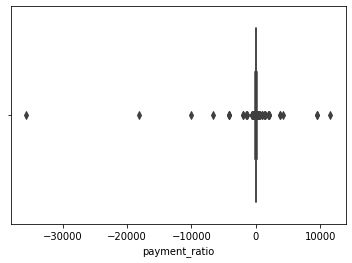

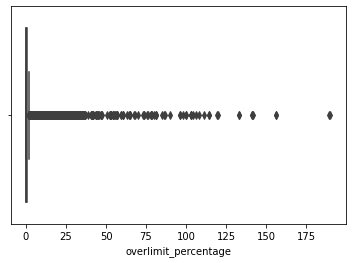

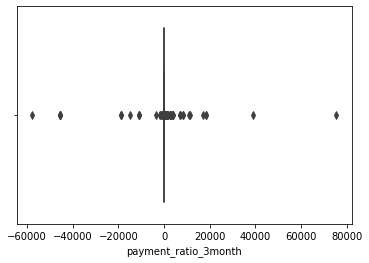

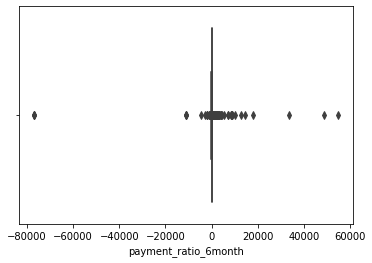

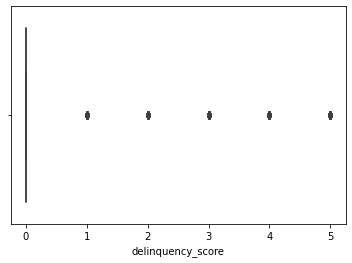

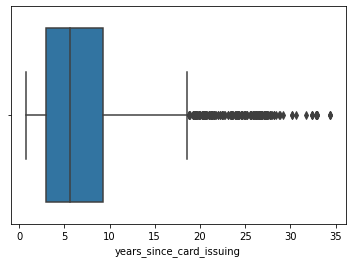

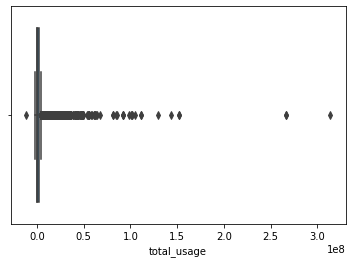

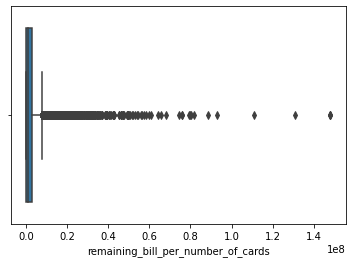

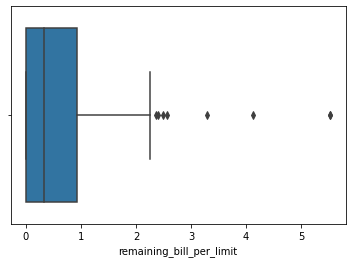

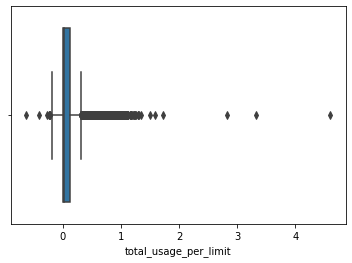

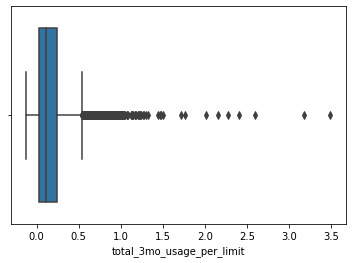

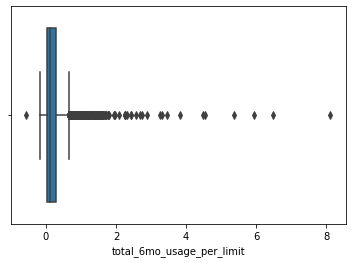

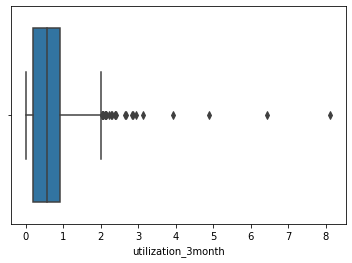

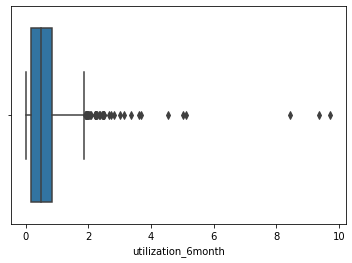

In [31]:
num_cols = X_train_num.select_dtypes(include=['float64', 'int64'])
for c in num_cols:
    ax = sns.boxplot(x=X_train[c])
    plt.show()

There are many features that have outliers present which is to be suspected. One potential way to handle these is to bin them together with the largest or smallest bin. The WOE process and algorithm will be explored to accomodate this.

## Weight of Evidence & Information Value

The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. 
- Positive WOE means Distribution of Goods > Distribution of Bads
- Negative WOE means Distribution of Goods < Distribution of Bads

Usage:  
First, create bins (categories / groups) for a continuous independent variable and then combine categories with similar WOE values and replace categories with WOE values. Use WOE values rather than input values in the model. Categories with similar WOE values can be combined to create bins.

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance.

| Information Value |   Variable Predictiveness   |
|:-----------------:|:---------------------------:|
| Less than 0.02    | Not useful for prediction   |
| 0.02 to 0.1       | Weak predictive Power       |
| 0.1 to 0.3        | Medium predictive Power     |
| 0.3 to 0.5        | Strong predictive Power     |
| >0.5              | Suspicious Predictive Power |

Some rules for IV, if the IV statistic is:
- Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)
- 0.02 to 0.1, then the predictor has only a weak relationship to the Goods/Bads odds ratio
- 0.1 to 0.3, then the predictor has a medium strength relationship to the Goods/Bads odds ratio
- 0.3 to 0.5, then the predictor has a strong relationship to the Goods/Bads odds ratio.
- Higher than 0.5, suspicious relationship (Check once)

In [235]:
X_train_prepr = X_train.copy()
y_train_prepr = y_train.copy()
X_test_prepr = X_test.copy()
y_test_prepr = y_test.copy()

In [69]:
# The function takes 3 arguments: a dataframe (X_train_prepr), a string (column name), and a dataframe (y_train_prepr).
# The function returns a dataframe as a result.
# We define a function to calculate WoE of continuous variables.
def woe_ordered_continuous(df, continuous_variabe_name, y_df):
    df = pd.concat([df[continuous_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [70]:
# We set the default style of the graphs to the seaborn style. 
sns.set()
# Below we define a function for plotting WoE across categories that takes 2 arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [163]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)

    return iv, data

**number_of_cards**

In [376]:
# Initial examination shows that there are some obs with number_of_cards of > 8 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['number_of_cards'] <= 8].copy()

# fine-classing
X_train_prepr_temp['number_of_cards_factor'] = pd.cut(X_train_prepr_temp['number_of_cards'], 5)

# preprocess 'number_of_cards'
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'number_of_cards_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,number_of_cards_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.993, 2.4]",8757,0.087130,0.701514,763.0,7994.0,0.675819,0.704069,-0.040951,NaN,NaN,0.007501
1,"(2.4, 3.8]",2249,0.095598,0.180165,215.0,2034.0,0.190434,0.179144,0.061116,0.008468,0.102067,0.007501
2,"(3.8, 5.2]",1279,0.096951,0.102459,124.0,1155.0,0.109832,0.101726,0.076664,0.001353,0.015547,0.007501
3,"(5.2, 6.6]",114,0.114035,0.009132,13.0,101.0,0.011515,0.008896,0.258067,0.017084,0.181403,0.007501
4,"(6.6, 8.0]",84,0.166667,0.006729,14.0,70.0,0.012400,0.006165,0.698800,0.052632,0.440733,0.007501


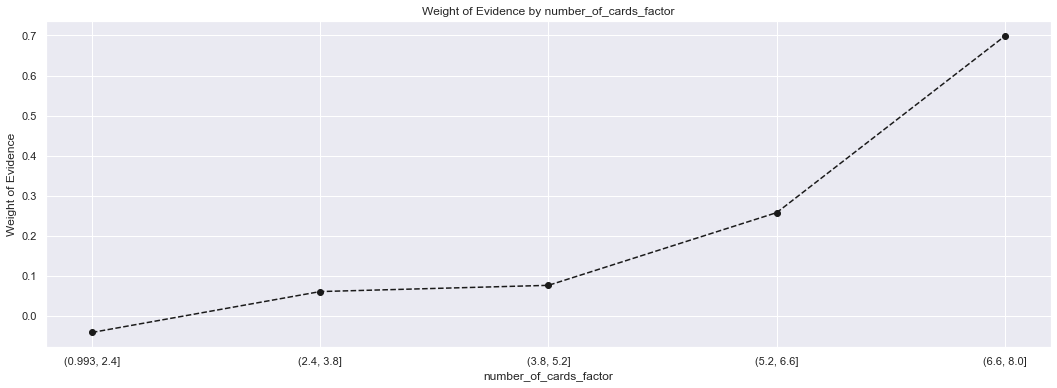

In [106]:
plot_by_woe(df_temp)

The IV value of `number_of_cards` is low, and this feature can also not be used.

**outstanding**

In [221]:
# Initial examination shows that there are some obs with outstanding of > 100000000 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['outstanding'] <= 10000000].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['outstanding'] = pd.cut(X_train_prepr_temp['outstanding'], 10)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'outstanding', y_train_prepr)
df_temp

,outstanding,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9996.64, 999664.0]",2166,0.144968,0.234390,314.0,1852.0,0.411533,0.218448,0.633343,NaN,NaN,0.297692
1,"(999664.0, 1999328.0]",1007,0.027805,0.108971,28.0,979.0,0.036697,0.115475,-1.146355,0.117162,1.779699,0.297692
2,"(1999328.0, 2998992.0]",1138,0.037786,0.123147,43.0,1095.0,0.056356,0.129158,-0.829338,0.009980,0.317018,0.297692
3,"(2998992.0, 3998656.0]",1332,0.078829,0.144140,105.0,1227.0,0.137615,0.144728,-0.050395,0.041043,0.778942,0.297692
4,"(3998656.0, 4998320.0]",960,0.056250,0.103885,54.0,906.0,0.070773,0.106865,-0.412083,0.022579,0.361688,0.297692
5,"(4998320.0, 5997984.0]",924,0.095238,0.099989,88.0,836.0,0.115334,0.098608,0.156680,0.038988,0.568763,0.297692
6,"(5997984.0, 6997648.0]",581,0.061962,0.062872,36.0,545.0,0.047182,0.064284,-0.309295,0.033276,0.465975,0.297692
7,"(6997648.0, 7997312.0]",486,0.084362,0.052592,41.0,445.0,0.053735,0.052489,0.023470,0.022400,0.332765,0.297692
8,"(7997312.0, 8996976.0]",379,0.073879,0.041013,28.0,351.0,0.036697,0.041401,-0.120610,0.010484,0.144079,0.297692
9,"(8996976.0, 9996640.0]",268,0.097015,0.029001,26.0,242.0,0.034076,0.028544,0.177131,0.023136,0.297741,0.297692


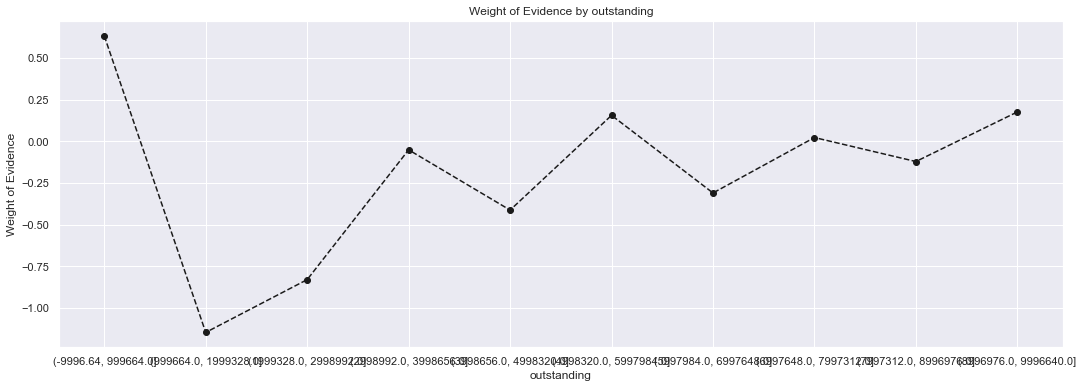

In [222]:
plot_by_woe(df_temp)

This feature has good prediction power.

**credit_limit**

In [263]:
# Initial examination shows that there are some obs with credit_limit of > 100000000 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['credit_limit'] <= 100000000].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['credit_limit'] = pd.cut(X_train_prepr_temp['credit_limit'], 10)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'credit_limit', y_train_prepr)
df_temp

,credit_limit,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(2903000.0, 12700000.0]",7577,0.086314,0.611986,654.0,6923.0,0.583929,0.614777,-0.051480,NaN,NaN,0.012453
1,"(12700000.0, 22400000.0]",1866,0.091640,0.150715,171.0,1695.0,0.152679,0.150519,0.014242,0.005326,0.065723,0.012453
2,"(22400000.0, 32100000.0]",769,0.102731,0.062111,79.0,690.0,0.070536,0.061273,0.140773,0.011091,0.126531,0.012453
3,"(32100000.0, 41800000.0]",326,0.101227,0.026331,33.0,293.0,0.029464,0.026019,0.124352,0.001504,0.016421,0.012453
4,"(41800000.0, 51500000.0]",352,0.107955,0.028431,38.0,314.0,0.033929,0.027884,0.196210,0.006728,0.071858,0.012453
5,"(51500000.0, 61200000.0]",452,0.092920,0.036508,42.0,410.0,0.037500,0.036409,0.029529,0.015034,0.166681,0.012453
6,"(61200000.0, 70900000.0]",361,0.099723,0.029158,36.0,325.0,0.032143,0.028861,0.107710,0.006803,0.078181,0.012453
7,"(70900000.0, 80600000.0]",289,0.107266,0.023342,31.0,258.0,0.027679,0.022911,0.189044,0.007543,0.081334,0.012453
8,"(80600000.0, 90300000.0]",180,0.133333,0.014538,24.0,156.0,0.021429,0.013853,0.436215,0.026067,0.247170,0.012453
9,"(90300000.0, 100000000.0]",209,0.057416,0.016881,12.0,197.0,0.010714,0.017494,-0.490280,0.075917,0.926495,0.012453


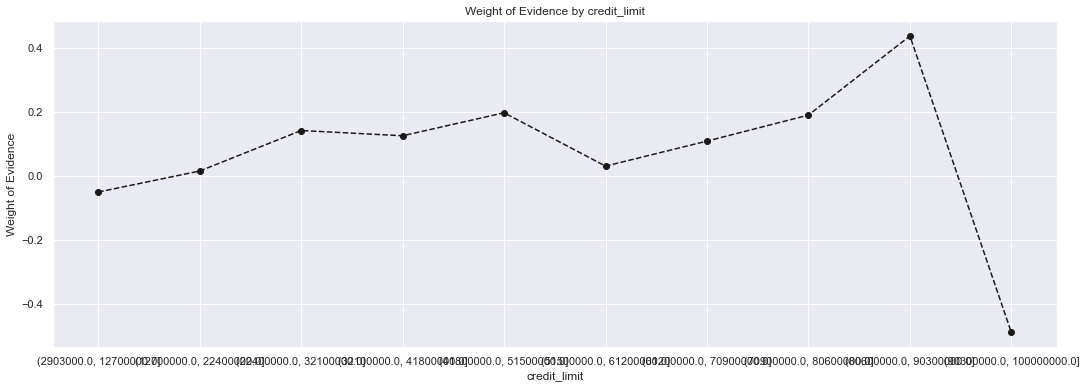

In [264]:
plot_by_woe(df_temp)

Based on the IV, this feature has low prediction power and can be dropped.

**bill**

In [145]:
# Initial examination shows that there are some obs with bill of > 6 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['bill'] <= 10000000].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['bill'] = pd.cut(X_train_prepr_temp['bill'], 10)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'bill', y_train_prepr)
df_temp

,bill,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(10107.087, 1018078.3]",3508,0.097206,0.345446,341.0,3167.0,0.422030,0.338825,0.219591,NaN,NaN,0.138987
1,"(1018078.3, 2016069.6]",1417,0.035286,0.139537,50.0,1367.0,0.061881,0.146250,-0.860102,0.061921,1.079693,0.138987
2,"(2016069.6, 3014060.9]",1182,0.049069,0.116396,58.0,1124.0,0.071782,0.120252,-0.515957,0.013784,0.344145,0.138987
3,"(3014060.9, 4012052.2]",1131,0.091070,0.111374,103.0,1028.0,0.127475,0.109982,0.147607,0.042000,0.663565,0.138987
4,"(4012052.2, 5010043.5]",866,0.061201,0.085278,53.0,813.0,0.065594,0.086980,-0.282191,0.029869,0.429798,0.138987
5,"(5010043.5, 6008034.8]",662,0.104230,0.065190,69.0,593.0,0.085396,0.063443,0.297161,0.043029,0.579351,0.138987
6,"(6008034.8, 7006026.1]",485,0.086598,0.047760,42.0,443.0,0.051980,0.047395,0.092349,0.017632,0.204812,0.138987
7,"(7006026.1, 8004017.4]",350,0.105714,0.034466,37.0,313.0,0.045792,0.033487,0.312963,0.019116,0.220615,0.138987
8,"(8004017.4, 9002008.7]",330,0.103030,0.032496,34.0,296.0,0.042079,0.031668,0.284250,0.002684,0.028714,0.138987
9,"(9002008.7, 10000000.0]",224,0.093750,0.022058,21.0,203.0,0.025990,0.021718,0.179565,0.009280,0.104685,0.138987


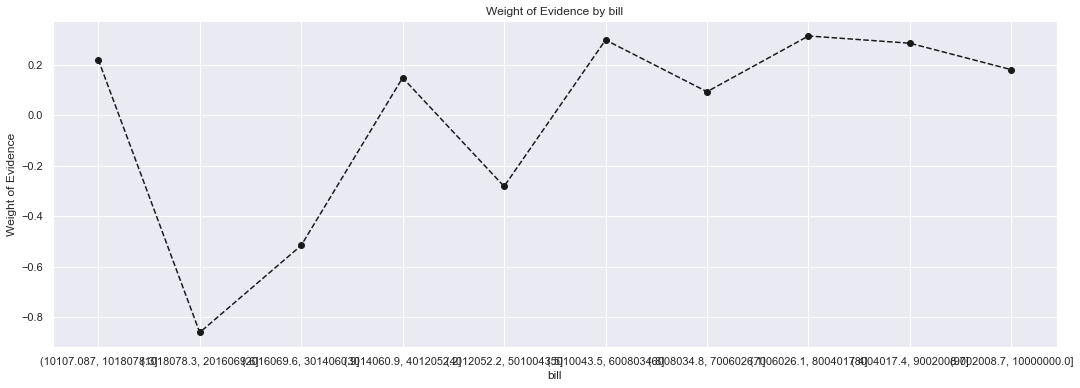

In [146]:
plot_by_woe(df_temp)

This feature can be kept and binned.

**total_cash_usage**

In [330]:
# Initial examination shows that there are some obs with total_cash_usage of > 1000000 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_cash_usage'] <= 1000000].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['total_cash_usage'] = pd.cut(X_train_prepr_temp['total_cash_usage'], 5)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_cash_usage', y_train_prepr)
df_temp

,total_cash_usage,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-1000.0, 200000.0]",11964,0.087680,0.977850,1049.0,10915.0,0.981291,0.977521,0.003849,NaN,NaN,0.002576
1,"(200000.0, 400000.0]",109,0.055046,0.008909,6.0,103.0,0.005613,0.009224,-0.496820,0.032634,0.500669,0.002576
2,"(400000.0, 600000.0]",62,0.096774,0.005067,6.0,56.0,0.005613,0.005015,0.112558,0.041728,0.609377,0.002576
3,"(600000.0, 800000.0]",37,0.054054,0.003024,2.0,35.0,0.001871,0.003135,-0.516051,0.042720,0.628609,0.002576
4,"(800000.0, 1000000.0]",63,0.095238,0.005149,6.0,57.0,0.005613,0.005105,0.094858,0.041184,0.610909,0.002576


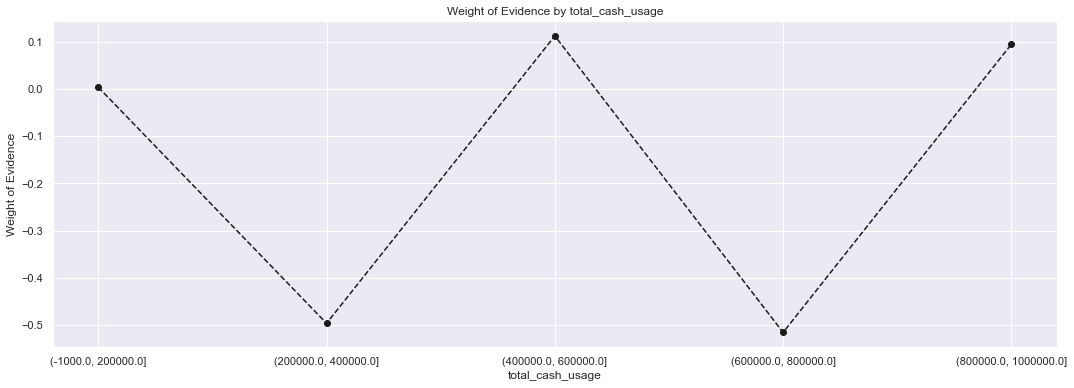

In [327]:
plot_by_woe(df_temp)

Due to the low IV, this feature will be dropped.

**total_retail_usage**

In [283]:
# Initial examination shows that there are some obs with total_retail_usage of > 0.5 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_retail_usage'] <= 50000000].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['total_retail_usage'] = pd.cut(X_train_prepr_temp['total_retail_usage'], 5)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_retail_usage', y_train_prepr)
df_temp

,total_retail_usage,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-12061527.279, 305455.8]",6779,0.145154,0.543189,984.0,5795.0,0.869258,0.510663,0.531931,NaN,NaN,0.670817
1,"(305455.8, 12610911.6]",5366,0.025345,0.429968,136.0,5230.0,0.120141,0.460874,-1.344456,0.119809,1.876387,0.670817
2,"(12610911.6, 24916367.4]",211,0.023697,0.016907,5.0,206.0,0.004417,0.018153,-1.413383,0.001648,0.068927,0.670817
3,"(24916367.4, 37221823.2]",84,0.047619,0.006731,4.0,80.0,0.003534,0.007050,-0.690677,0.023922,0.722706,0.670817
4,"(37221823.2, 49527279.0]",40,0.075000,0.003205,3.0,37.0,0.002650,0.003260,-0.207250,0.027381,0.483427,0.670817


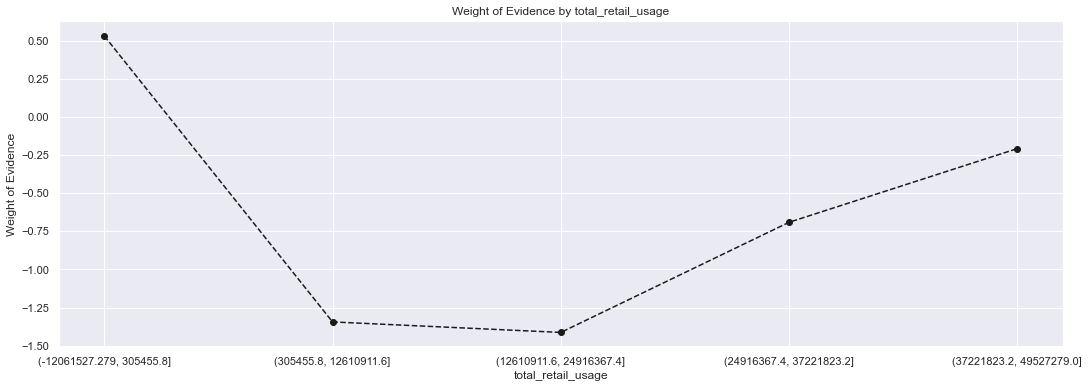

In [284]:
plot_by_woe(df_temp)

This feature has high predictive power and will be kept and binned.

**overlimit_percentage**

In [382]:
# Initial examination shows that there are some obs with overlimit_percentage of > 25 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['overlimit_percentage'] <= 25].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['overlimit_percentage'] = pd.cut(X_train_prepr_temp['overlimit_percentage'], 10)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'overlimit_percentage', y_train_prepr)
df_temp

,overlimit_percentage,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.0249, 2.49]",9681,0.066006,0.789319,639.0,9042.0,0.603399,0.806889,-0.290607,NaN,NaN,0.219216
1,"(2.49, 4.98]",450,0.133333,0.036690,60.0,390.0,0.056657,0.034803,0.487322,0.067328,0.777929,0.219216
2,"(4.98, 7.47]",331,0.141994,0.026987,47.0,284.0,0.044381,0.025344,0.560298,0.008661,0.072976,0.219216
3,"(7.47, 9.96]",373,0.168901,0.030412,63.0,310.0,0.059490,0.027664,0.765687,0.026907,0.205389,0.219216
4,"(9.96, 12.45]",361,0.163435,0.029433,59.0,302.0,0.055713,0.026950,0.726235,0.005466,0.039452,0.219216
5,"(12.45, 14.94]",377,0.143236,0.030738,54.0,323.0,0.050992,0.028824,0.570456,0.020199,0.155779,0.219216
6,"(14.94, 17.43]",273,0.157509,0.022258,43.0,230.0,0.040604,0.020525,0.682245,0.014273,0.111789,0.219216
7,"(17.43, 19.92]",189,0.238095,0.015410,45.0,144.0,0.042493,0.012850,1.195973,0.080586,0.513728,0.219216
8,"(19.92, 22.41]",125,0.216000,0.010192,27.0,98.0,0.025496,0.008745,1.069994,0.022095,0.125980,0.219216
9,"(22.41, 24.9]",105,0.209524,0.008561,22.0,83.0,0.020774,0.007407,1.031326,0.006476,0.038668,0.219216


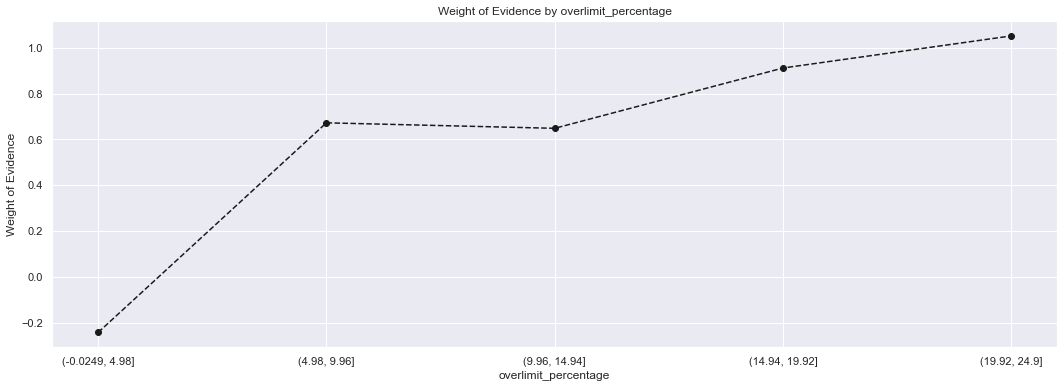

In [345]:
plot_by_woe(df_temp)

This feature has medium prediction power and will be binned.

**payment_ratio_6month**

In [349]:
# Initial examination shows that there are some obs with payment_ratio_6month of > 0.5 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['payment_ratio_6month'] <= 2000].copy()
X_train_prepr_temp = X_train_prepr_temp[X_train_prepr_temp['payment_ratio_6month'] > -1000]

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['payment_ratio_6month'] = pd.cut(X_train_prepr_temp['payment_ratio_6month'], 4)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'payment_ratio_6month', y_train_prepr)
df_temp

,payment_ratio_6month,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-531.296, 37.477]",4378,0.145729,0.351111,638.0,3740.0,0.565603,0.329777,0.539476,NaN,NaN,0.234043
1,"(37.477, 603.985]",8062,0.060159,0.646563,485.0,7577.0,0.429965,0.668107,-0.440745,0.085570,0.980221,0.234043
2,"(603.985, 1170.492]",21,0.190476,0.001684,4.0,17.0,0.003546,0.001499,0.861059,0.130317,1.301805,0.234043
3,"(1170.492, 1737.0]",8,0.125000,0.000642,1.0,7.0,0.000887,0.000617,0.362068,0.065476,0.498991,0.234043


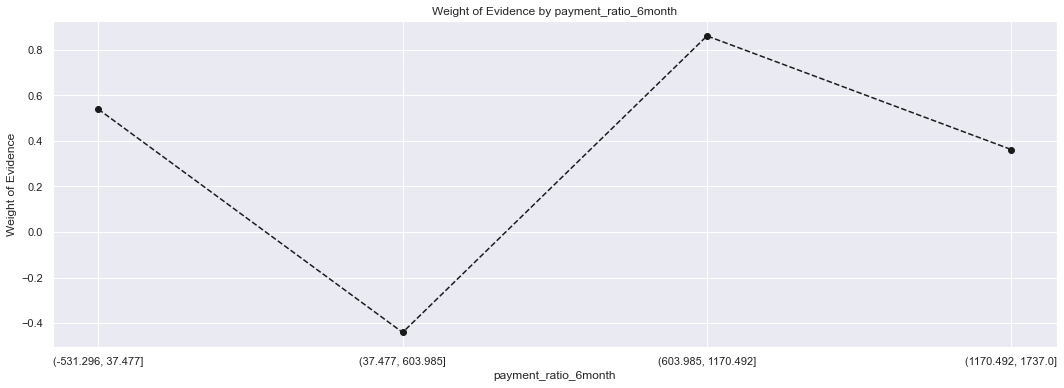

In [350]:
plot_by_woe(df_temp)

This feature has medium prediction power.

**delinquency_score**

In [351]:
# Initial examination shows that there are some obs with delinquency_score of > 0.5 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['delinquency_score'] <= 1].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['delinquency_score'] = pd.cut(X_train_prepr_temp['delinquency_score'], 5)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'delinquency_score', y_train_prepr)
df_temp

,delinquency_score,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 0.2]",12318,0.083130,0.998298,1024.0,11294.0,0.994175,0.998674,-0.004515,NaN,NaN,0.006678
1,"(0.2, 0.4]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006678
2,"(0.4, 0.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006678
3,"(0.6, 0.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006678
4,"(0.8, 1.0]",21,0.285714,0.001702,6.0,15.0,0.005825,0.001326,1.479749,NaN,NaN,0.006678


This feature has a low predictive power and will be dropped.

**total_usage**

In [289]:
# Initial examination shows that there are some obs with total_usage of > 1 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_usage'] <= 50000000].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['total_usage'] = pd.cut(X_train_prepr_temp['total_usage'], 5)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_usage', y_train_prepr)
df_temp

,total_usage,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-12061527.279, 305455.8]",6548,0.146457,0.524679,959.0,5589.0,0.847173,0.492510,0.542391,NaN,NaN,0.624615
1,"(305455.8, 12610911.6]",5581,0.028131,0.447196,157.0,5424.0,0.138693,0.477970,-1.237287,0.118326,1.779678,0.624615
2,"(12610911.6, 24916367.4]",226,0.039823,0.018109,9.0,217.0,0.007951,0.019122,-0.877617,0.011692,0.359670,0.624615
3,"(24916367.4, 37221823.2]",85,0.047059,0.006811,4.0,81.0,0.003534,0.007138,-0.703099,0.007236,0.174518,0.624615
4,"(37221823.2, 49527279.0]",40,0.075000,0.003205,3.0,37.0,0.002650,0.003260,-0.207250,0.027941,0.495849,0.624615


This feature has high prediction power and will be binned.

**remaining_bill_per_number_of_cards**

In [311]:
# Initial examination shows that there are some obs with remaining_bill_per_number_of_cards of > 5000000 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['remaining_bill_per_number_of_cards'] <= 5000000].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['remaining_bill_per_number_of_cards'] = pd.cut(X_train_prepr_temp['remaining_bill_per_number_of_cards'], 5)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'remaining_bill_per_number_of_cards', y_train_prepr)
df_temp

,remaining_bill_per_number_of_cards,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5000.0, 1000000.0]",5946,0.067608,0.565585,402.0,5544.0,0.489051,0.572077,-0.156807,NaN,NaN,0.028956
1,"(1000000.0, 2000000.0]",1993,0.090316,0.189575,180.0,1813.0,0.218978,0.187081,0.157431,0.022708,0.314238,0.028956
2,"(2000000.0, 3000000.0]",1399,0.088635,0.133073,124.0,1275.0,0.150852,0.131565,0.136793,0.001681,0.020639,0.028956
3,"(3000000.0, 4000000.0]",736,0.096467,0.070009,71.0,665.0,0.086375,0.068620,0.230105,0.007833,0.093313,0.028956
4,"(4000000.0, 5000000.0]",439,0.102506,0.041758,45.0,394.0,0.054745,0.040656,0.297524,0.006038,0.067419,0.028956


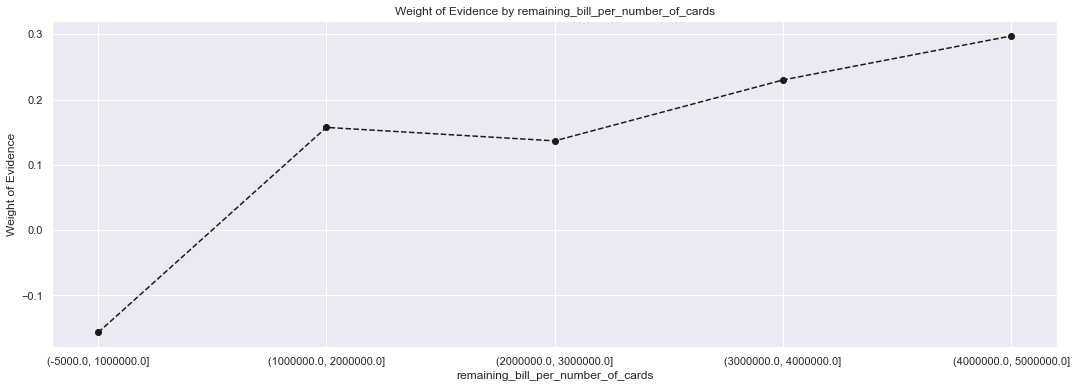

In [312]:
plot_by_woe(df_temp)

This feature has low prediction power but will be kept and binned.

**remaining_bill_per_limit**

In [305]:
# Initial examination shows that there are some obs with remaining_bill_per_limit of > 3 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['remaining_bill_per_limit'] <= 3].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['remaining_bill_per_limit'] = pd.cut(X_train_prepr_temp['remaining_bill_per_limit'], 5)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'remaining_bill_per_limit', y_train_prepr)
df_temp

,remaining_bill_per_limit,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.00257, 0.514]",7041,0.063201,0.562740,445.0,6596.0,0.393805,0.579512,-0.386329,NaN,NaN,0.243912
1,"(0.514, 1.028]",3305,0.085930,0.264146,284.0,3021.0,0.251327,0.265419,-0.054553,0.022729,0.331775,0.243912
2,"(1.028, 1.542]",2095,0.180907,0.167439,379.0,1716.0,0.335398,0.150764,0.799600,0.094977,0.854154,0.243912
3,"(1.542, 2.056]",57,0.280702,0.004556,16.0,41.0,0.014159,0.003602,1.368832,0.099795,0.569232,0.243912
4,"(2.056, 2.57]",14,0.428571,0.001119,6.0,8.0,0.005310,0.000703,2.022133,0.147870,0.653301,0.243912


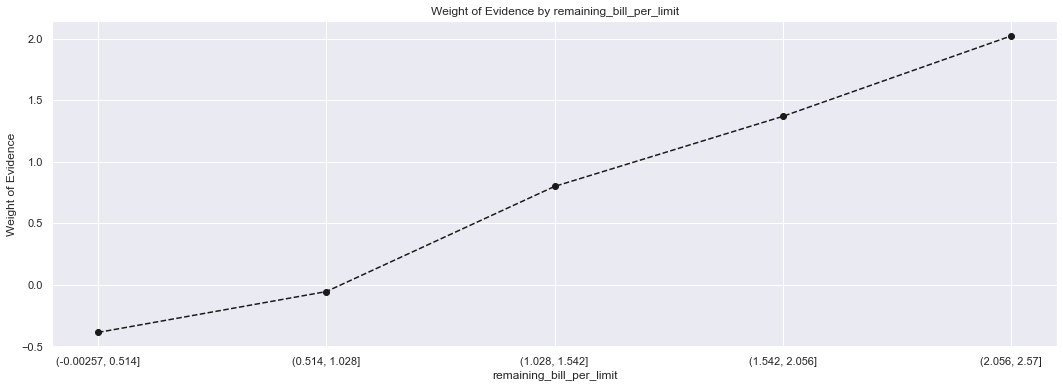

In [307]:
plot_by_woe(df_temp)

This feature has medium prediction power and will be kept and binned.

**total_usage_per_limit**

In [353]:
# Initial examination shows that there are some obs with total_usage_per_limit of > 1 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_usage_per_limit'] <= 1].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['total_usage_per_limit'] = pd.cut(X_train_prepr_temp['total_usage_per_limit'], 10)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_usage_per_limit', y_train_prepr)
df_temp

,total_usage_per_limit,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.634, -0.469]",1,0.000000,0.000080,0.0,1.0,0.000000,0.000088,-inf,NaN,NaN,inf
1,"(-0.469, -0.306]",1,0.000000,0.000080,0.0,1.0,0.000000,0.000088,-inf,0.000000,NaN,inf
2,"(-0.306, -0.142]",6,0.166667,0.000482,1.0,5.0,0.000885,0.000442,0.694827,0.166667,inf,inf
3,"(-0.142, 0.0208]",6168,0.153048,0.495461,944.0,5224.0,0.835398,0.461525,0.593373,0.013619,0.101455,inf
4,"(0.0208, 0.184]",3966,0.031014,0.318580,123.0,3843.0,0.108850,0.339518,-1.137559,0.122034,1.730932,inf
5,"(0.184, 0.347]",1229,0.029292,0.098723,36.0,1193.0,0.031858,0.105398,-1.196442,0.001722,0.058883,inf
6,"(0.347, 0.51]",506,0.027668,0.040646,14.0,492.0,0.012389,0.043467,-1.255156,0.001624,0.058714,inf
7,"(0.51, 0.674]",288,0.013889,0.023134,4.0,284.0,0.003540,0.025091,-1.958415,0.013779,0.703258,inf
8,"(0.674, 0.837]",151,0.046358,0.012129,7.0,144.0,0.006195,0.012722,-0.719638,0.032469,1.238777,inf
9,"(0.837, 1.0]",133,0.007519,0.010684,1.0,132.0,0.000885,0.011662,-2.578537,0.038839,1.858899,inf


In [316]:
iv, data = calc_iv(df, 'total_usage_per_limit', 'default_flag')
print(iv)

0.5046212062347094


Using the novel function to calculate IV, this feature has medium prediction power and will be kept and binned.

**total_3mo_usage_per_limit**

In [357]:
# Initial examination shows that there are some obs with total_3mo_usage_per_limit of > 1 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_3mo_usage_per_limit'] <= 1].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['total_3mo_usage_per_limit'] = pd.cut(X_train_prepr_temp['total_3mo_usage_per_limit'], 5)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_3mo_usage_per_limit', y_train_prepr)
df_temp

,total_3mo_usage_per_limit,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.127, 0.0992]",5953,0.118428,0.477462,705.0,5248.0,0.624446,0.462827,0.299511,NaN,NaN,0.108933
1,"(0.0992, 0.324]",4718,0.065918,0.378409,311.0,4407.0,0.275465,0.388659,-0.344241,0.052510,0.643752,0.108933
2,"(0.324, 0.55]",1264,0.057753,0.101380,73.0,1191.0,0.064659,0.105036,-0.485173,0.008165,0.140933,0.108933
3,"(0.55, 0.775]",408,0.078431,0.032724,32.0,376.0,0.028344,0.033160,-0.156937,0.020678,0.328236,0.108933
4,"(0.775, 1.0]",125,0.064000,0.010026,8.0,117.0,0.007086,0.010318,-0.375817,0.014431,0.218879,0.108933


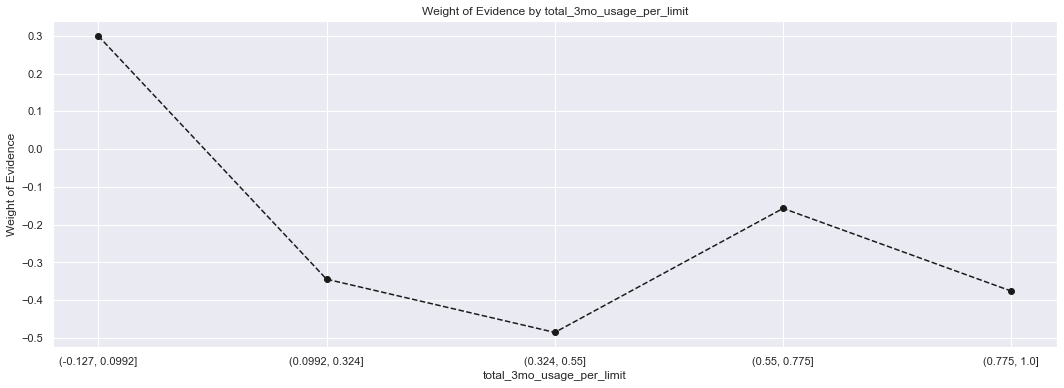

In [358]:
plot_by_woe(df_temp)

This feature has medium prediction power and will be binned.

**total_6mo_usage_per_limit**

In [384]:
# Initial examination shows that there are some obs with total_6mo_usage_per_limit of > 6 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_6mo_usage_per_limit'] <= 0.5].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['total_6mo_usage_per_limit'] = pd.cut(X_train_prepr_temp['total_6mo_usage_per_limit'], 5)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_6mo_usage_per_limit', y_train_prepr)
df_temp

,total_6mo_usage_per_limit,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.57, -0.355]",1,0.000000,0.000089,0.0,1.0,0.000000,0.000097,-inf,NaN,NaN,inf
1,"(-0.355, -0.141]",1,0.000000,0.000089,0.0,1.0,0.000000,0.000097,-inf,0.000000,NaN,inf
2,"(-0.141, 0.0724]",4803,0.107016,0.425421,514.0,4289.0,0.507404,0.417340,0.195407,0.107016,inf,inf
3,"(0.0724, 0.286]",4622,0.075292,0.409389,348.0,4274.0,0.343534,0.415880,-0.191111,0.031724,0.386517,inf
4,"(0.286, 0.5]",1863,0.081052,0.165013,151.0,1712.0,0.149062,0.166586,-0.111146,0.005760,0.079965,inf


In [366]:
iv, data = calc_iv(df, 'total_6mo_usage_per_limit', 'default_flag')
print(iv)

0.5545100133878893


Using the novel function to calculate IV, this feature has medium prediction power and will be kept and binned.

**utilization_3month**

In [367]:
# Initial examination shows that there are some obs with utilization_3month of > 3 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['utilization_3month'] <= 3].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['utilization_3month'] = pd.cut(X_train_prepr_temp['utilization_3month'], 5)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'utilization_3month', y_train_prepr)
df_temp

,utilization_3month,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.00265, 0.588]",6433,0.066221,0.514188,426.0,6007.0,0.376658,0.527856,-0.337486,NaN,NaN,0.145788
1,"(0.588, 1.176]",5656,0.106966,0.452082,605.0,5051.0,0.534925,0.443849,0.186642,0.040745,0.524128,0.145788
2,"(1.176, 1.764]",380,0.221053,0.030373,84.0,296.0,0.074271,0.026011,1.049213,0.114087,0.862570,0.145788
3,"(1.764, 2.352]",34,0.294118,0.002718,10.0,24.0,0.008842,0.002109,1.433286,0.073065,0.384074,0.145788
4,"(2.352, 2.94]",8,0.750000,0.000639,6.0,2.0,0.005305,0.000176,3.407368,0.455882,1.974081,0.145788


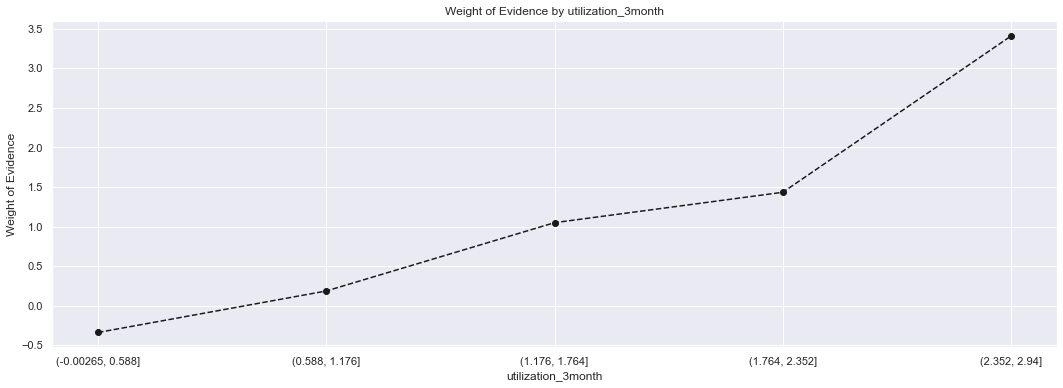

In [368]:
plot_by_woe(df_temp)

This feature has medium prediction power and will be binned.

**utilization_6month**

In [372]:
# Initial examination shows that there are some obs with utilization_3month of > 4 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['utilization_6month'] <= 4].copy()

# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr_temp['utilization_6month'] = pd.cut(X_train_prepr_temp['utilization_6month'], 5)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'utilization_6month', y_train_prepr)
df_temp

,utilization_6month,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.00367, 0.734]",6849,0.054314,0.669436,372.0,6477.0,0.503383,0.682364,-0.304212,NaN,NaN,0.137773
1,"(0.734, 1.468]",3268,0.107099,0.319421,350.0,2918.0,0.473613,0.307417,0.432186,0.052785,0.736398,0.137773
2,"(1.468, 2.202]",91,0.131868,0.008895,12.0,79.0,0.016238,0.008323,0.668365,0.024769,0.236179,0.137773
3,"(2.202, 2.936]",18,0.222222,0.001759,4.0,14.0,0.005413,0.001475,1.300144,0.090354,0.631778,0.137773
4,"(2.936, 3.67]",5,0.200000,0.000489,1.0,4.0,0.001353,0.000421,1.166612,0.022222,0.133531,0.137773


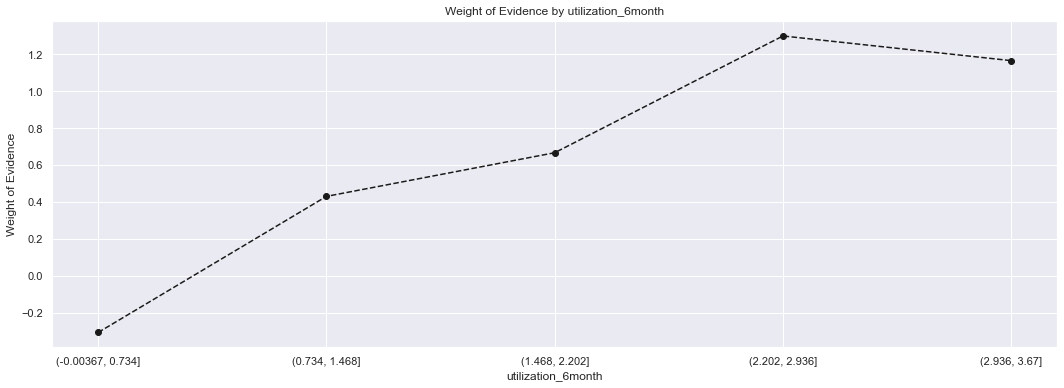

In [373]:
plot_by_woe(df_temp)

This feature has medium prediction power and will be binned.

Using the binning method, the outliers will be incorporated within the bins. The bins will be created from the tables for each numerical column above.